In [132]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

if not os.path.exists('figures'):
    os.makedirs('figures')

In [133]:
dfs = []
for filename in os.listdir('exports'):
    if filename.endswith('.csv'): 
        f = os.path.join('exports', filename)
        dfs.append((filename, pd.read_csv(f)))

In [134]:
from collections import defaultdict
dic = defaultdict(lambda: defaultdict(list))
for d in dfs:
    name = d[0].split('_')[-1].replace('.csv', '')
    last_epoch = d[1].iloc[-1]['Step'], d[1].iloc[-1]['Value']
    last_val = d[1].iloc[-1]['Value']
    if 'base' in d[0]:
        m = 'rnnlm'
        if 'vae' in d[0]:
            m = 'vae'       
        dic[m][name].append(last_val)

In [135]:
print('baseline, 3 runs:')
for k, v in dic.items():
    for k2, v2 in v.items():
        print(k, k2, np.array(v2).mean(), len(v2))

baseline, 3 runs:
vae likelihood -129.62061564127603 3
vae ELBO 0.22735115885734558 3
vae perplexity 216.5278574625651 3
vae accuracy 0.2565816342830658 3
vae Loss 5.01672455429277e-08 3
rnnlm accuracy 0.2599253257115682 3
rnnlm likelihood -133.53736877441406 3
rnnlm perplexity 255.79490661621094 3


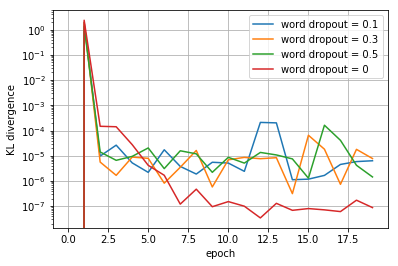

In [136]:
for d in dfs:
    if 'word' in d[0]:
        plt.plot(d[1]['Step'], d[1]['Value'], label='{} {} = {}'.format(d[0].split('_')[3], d[0].split('_')[4], d[0].split('_')[5].split('-')[0]))

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('KL divergence')
plt.yscale('log')
plt.savefig('figures/kl_divergence_word_dropout.eps', format='eps')
plt.show()